#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1- Basic Data Exploration:

In [3]:
# Identify the number of rows and columns in the dataset.

rows_number, columns_number = df.shape
print(f"number of columns: {columns_number}")
print(f"number of rows: {rows_number}")

number of columns: 13
number of rows: 148654


In [4]:
# Determine the data types of each column.

def fill_dtype(data_column, data_type):
    """ replace "object" data type with another proper type """
    if df[data_column].count() == 0:
        return data_column, np.nan
    
    if data_type == "object":
        return data_column, "*String"
    
    return data_column, data_type

print(df["Status"].count())
dt_list = list(map(fill_dtype, df.columns, df.dtypes))
dt = pd.DataFrame(dt_list)
dt.columns = ["column", "type"]
print(dt)

0
              column     type
0                 Id    int64
1       EmployeeName  *String
2           JobTitle  *String
3            BasePay  float64
4        OvertimePay  float64
5           OtherPay  float64
6           Benefits  float64
7           TotalPay  float64
8   TotalPayBenefits  float64
9               Year    int64
10             Notes      NaN
11            Agency  *String
12            Status      NaN


In [5]:
# Check for missing values in each column.

check = zip(df.columns, df.isnull().sum())
missing_count = list(filter(lambda x: x[1] > 0, check))
missing_percentage = list(map(lambda x: "% " + str(round(x[1] * 100 / df.shape[0], 4)), missing_count))
missings = pd.DataFrame(missing_count)
missings.columns = ["column", "null count"]
missings["percentage"] = missing_percentage
print(missings)

        column  null count percentage
0      BasePay         609   % 0.4097
1  OvertimePay           4   % 0.0027
2     OtherPay           4   % 0.0027
3     Benefits       36163   % 24.327
4        Notes      148654    % 100.0
5       Status      148654    % 100.0


# 2-  Descriptive Statistics:

In [6]:
# Calculate basic statistics mean, median, mode, minimum, and maximum salary, 
# determine the range of salaries, and find the standard deviation.

salaries = df.iloc[:, 3: 9]
statistics = pd.DataFrame(salaries.describe())
statistics = statistics.drop(index = ["count", "25%", "75%"])
statistics = statistics.rename(index = {"50%": "median"})
statistics.loc["range"] = statistics.loc["max"] - statistics.loc["min"]
print(statistics)

              BasePay    OvertimePay       OtherPay      Benefits  \
mean     66325.448840    5066.059886    3648.767297  25007.893151   
std      42764.635495   11454.380559    8056.601866  15402.215858   
min       -166.010000      -0.010000   -7058.590000    -33.890000   
median   65007.450000       0.000000     811.270000  28628.620000   
max     319275.010000  245131.880000  400184.250000  96570.660000   
range   319441.020000  245131.890000  407242.840000  96604.550000   

             TotalPay  TotalPayBenefits  
mean     74768.321972      93692.554811  
std      50517.005274      62793.533483  
min       -618.130000       -618.130000  
median   71426.610000      92404.090000  
max     567595.430000     567595.430000  
range   568213.560000     568213.560000  


# 3- Data Cleaning:

In [7]:
# Handle missing data by suitable method with explain why you use it.

df.drop(columns=["Notes", "Status"], inplace=True)
# I droped "Notes" and "Status" because all of their values are NULL
df["BasePay"].fillna(df["TotalPayBenefits"] - df["TotalPay"] - df["Benefits"], inplace=True) 
# I used this method because the remaining subtraction of "TotalPayBenefits" with other columns must be the "BasePay"

df["OtherPay"].fillna(df["TotalPayBenefits"] - df["TotalPay"] - df["BasePay"], inplace=True)
# I used this method because the remaining subtraction of "TotalPayBenefits" with other columns must be the "OtherPay"

df["Benefits"].fillna(0, inplace=True)
df["OvertimePay"].fillna(0, inplace=True)

# 4- Basic Data Visualization:

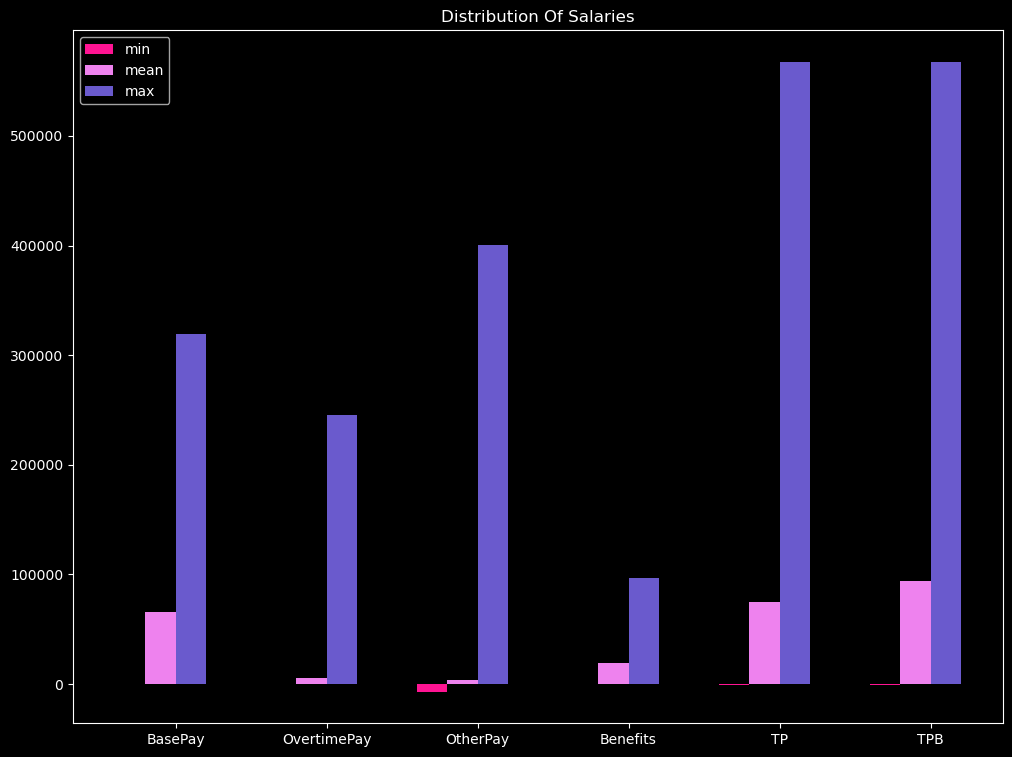

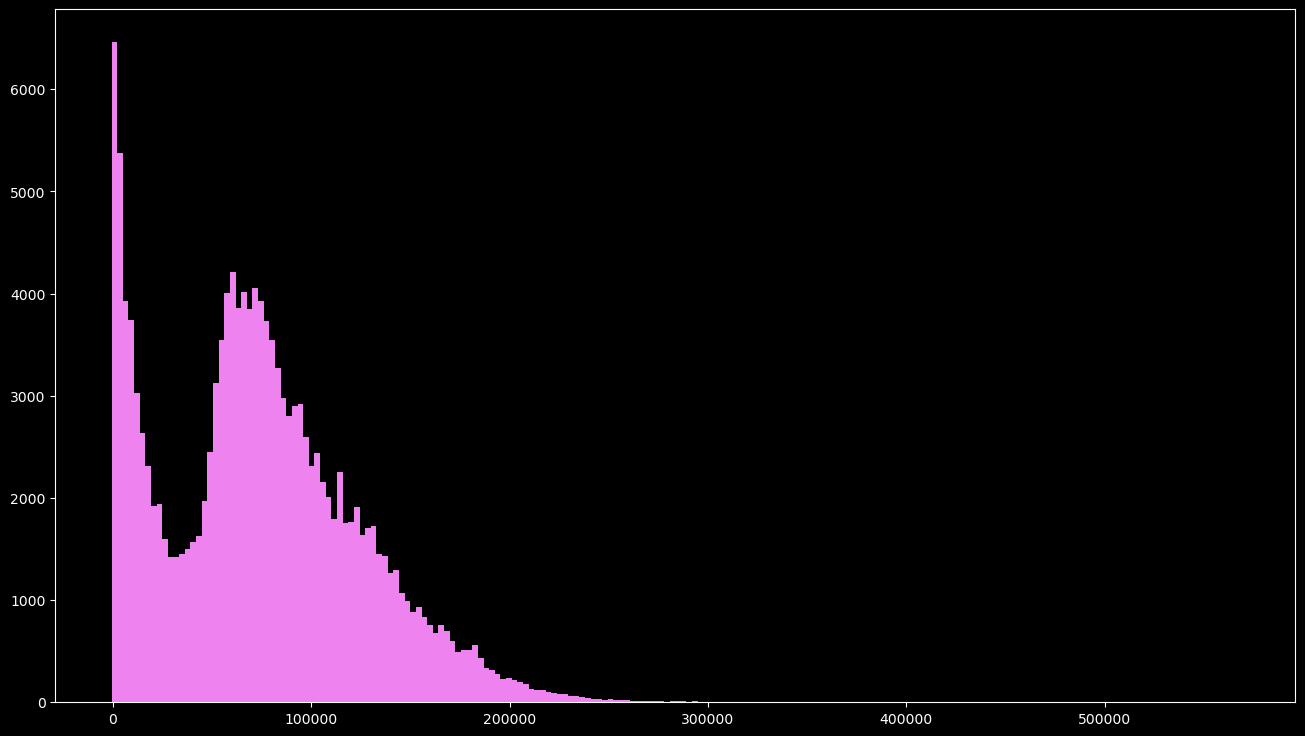

In [8]:
# Create histograms or bar charts to visualize the distribution of salaries.

salaries = pd.DataFrame(df.iloc[:, 3: 9])
statistics = pd.DataFrame(salaries.describe())
plt.style.use('dark_background') 
x_s = np.arange(6)
colors =  ["deeppink", "violet", "slateblue"]
plt.figure(figsize=(12,9))
for move, stat in enumerate(["min", "mean", "max"]):
    info = statistics.loc[stat]
    
    plt.bar(x_s + (move-1.5) * 0.2, info, width=0.2, color=colors[move])

x = list(salaries.columns[0: -2]) + ["TP", "TPB"]
plt.xticks(x_s, x)
plt.legend(["min", "mean", "max"])

plt.title("distribution of salaries".title())

plt.show()
plt.figure(figsize=(16,9))
plt.hist(df["TotalPay"], bins = 200, color="violet")
plt.show()
    

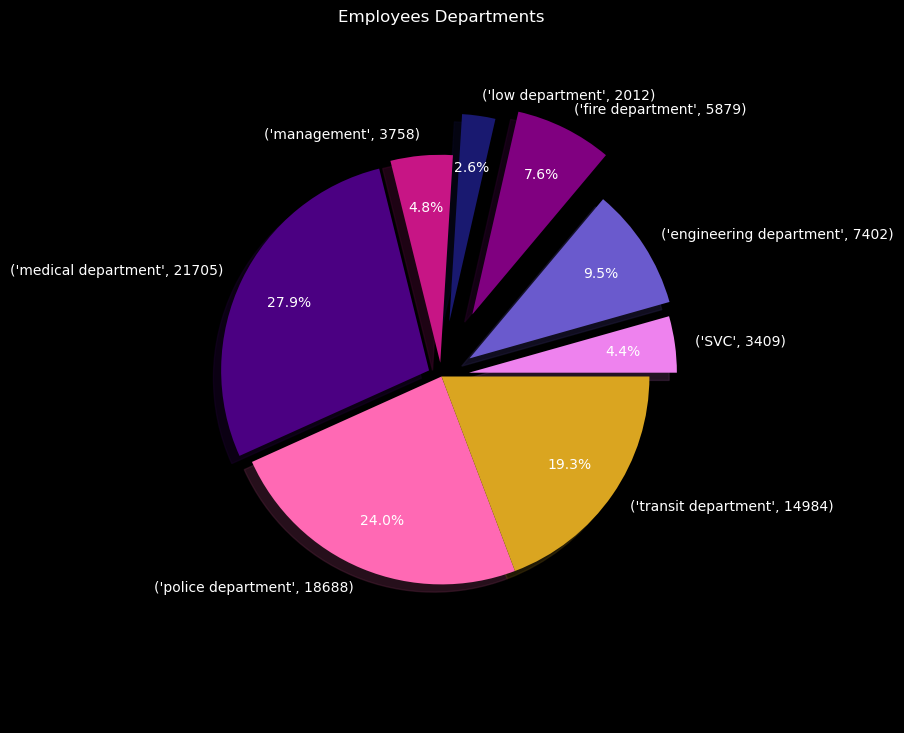

In [9]:
# Use pie charts to represent the proportion of employees in different departments.

def get_department(txt):
    txt = txt.lower()
    
    if "fire" in txt:
        return "fire department"
    elif "attorney" in txt or "witness" in txt:
        return "low department"  
    elif "nurs" in txt or "phsician" in txt or "medic" in txt or "patient" in txt or "health" in txt:
        return "medical department"
    elif "manager" in txt:
        return "management"
    elif "officer" in txt or "guard" in txt or "police" in txt or "sheriff" in txt or "sergeant" in txt:
        return "police department"
    elif "operator" in txt or "transit" in txt or "driver" in txt or  "track" in txt or "porter" in txt:
        return "transit department"
    elif "svc" in txt:
        return "SVC"
    elif "eng" in txt:
        return "engineering department"
    
    return "other"

departments = tuple(map(get_department, df["JobTitle"]))
df["Department"] = departments
c =  ['goldenrod',
     'hotpink',
     'indigo',
     'mediumvioletred',
     'midnightblue',
     'purple',
     'slateblue',
     'violet']

d = df.groupby("Department")
x = []
y = []
for i in d:
    if i[0] != "other":
        x.append((i[0], i[1].count()[0]))
        y.append(i[1].count()[0])

e = [0.1, .12, .25, .2, .05, .05, 0, 0]
plt.figure(figsize=(16,9))
plt.pie(y, 
        labels = x, 
        autopct='%1.1f%%',
        explode=e,
        shadow=True, 
        colors= sorted(c, reverse=True), 
        pctdistance=.75, 
        startangle=0,
        radius=0.75)
plt.title("employees departments".title())
plt.show()

# 5- Grouped Analysis:

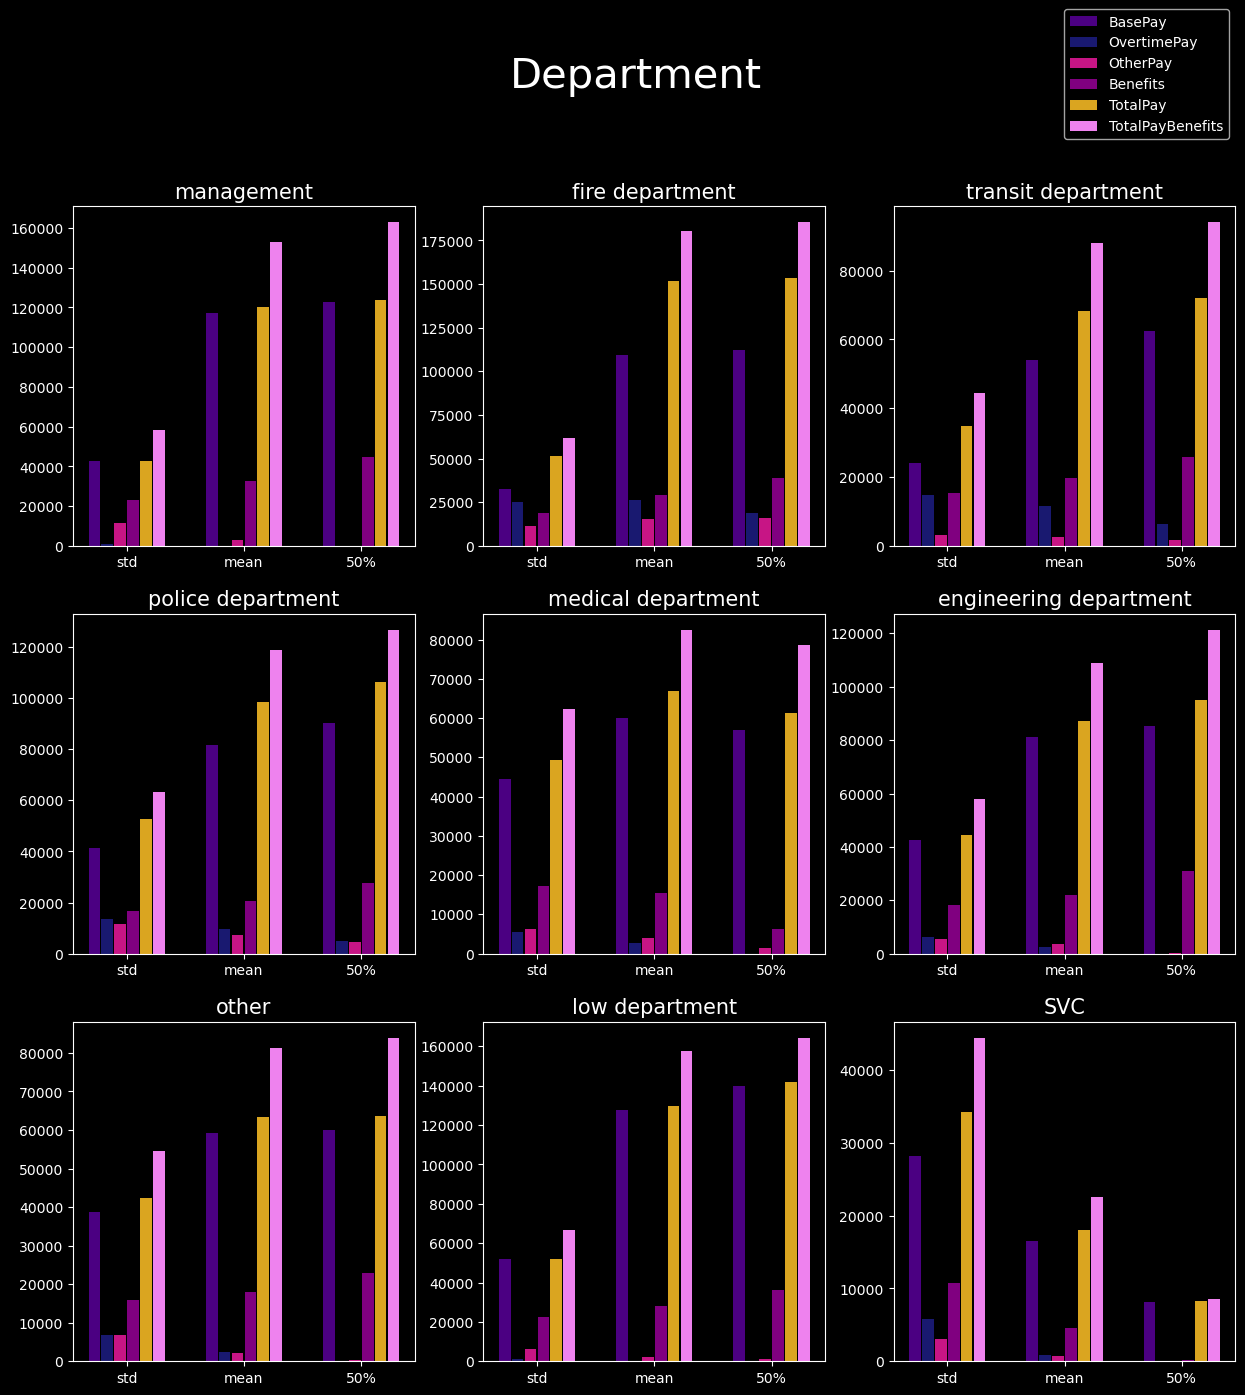

In [10]:
# Group the data by one or more columns and calculate summary statistics for each group,
# and compare the average salaries across different groups.


d_df = pd.DataFrame(df.groupby("Department").describe())
s = ["std", "mean", "50%"]

c =  ['indigo',
     'midnightblue',
     'mediumvioletred',
     'purple',
     'goldenrod',
     'violet',
     'royalblue']

d = df.groupby("Department")
xdf = pd.DataFrame([])
for i in df["Department"].unique():
    l = []
    for j in salaries.columns:
        v = [] 
        
        for k in s:
            v.append(d_df.loc[i][j][k])
            
        l.append({j: v})
    xdf[i] = l

figure, axis = plt.subplots(3, 3, figsize=(15, 15))
figure.suptitle("Department", fontsize=30)
x_s =  np.arange(3)
leg = []
for e, col in enumerate(xdf.columns):
    for i in range(0, 6):
        axis[e % 3][e // 3].bar(x_s + ((i - 2.5)  * 0.11) , *list(xdf[col])[i].values(), color = c[i], width=0.1)
        if len(leg) < 6:
            leg.append(*list(xdf[col])[i].keys())
    axis[e % 3][e // 3].set_xticks(x_s, s)
    axis[e % 3][e // 3].set_title(col, fontsize=15)
plt.legend(leg, bbox_to_anchor=(1, 4))
plt.show()

# 6- Simple Correlation Analysis:

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.000000,0.268119,0.281787,0.654139,0.954690,0.946861,0.030885
OvertimePay,0.268119,1.000000,0.316592,0.226173,0.504860,0.467984,0.027870
OtherPay,0.281787,0.316592,1.000000,0.160334,0.470496,0.422341,-0.002499
Benefits,0.654139,0.226173,0.160334,1.000000,0.632202,0.781963,0.461408
TotalPay,0.954690,0.504860,0.470496,0.632202,1.000000,0.977313,0.032090
TotalPayBenefits,0.946861,0.467984,0.422341,0.781963,0.977313,1.000000,0.151947
Year,0.030885,0.027870,-0.002499,0.461408,0.032090,0.151947,1.000000


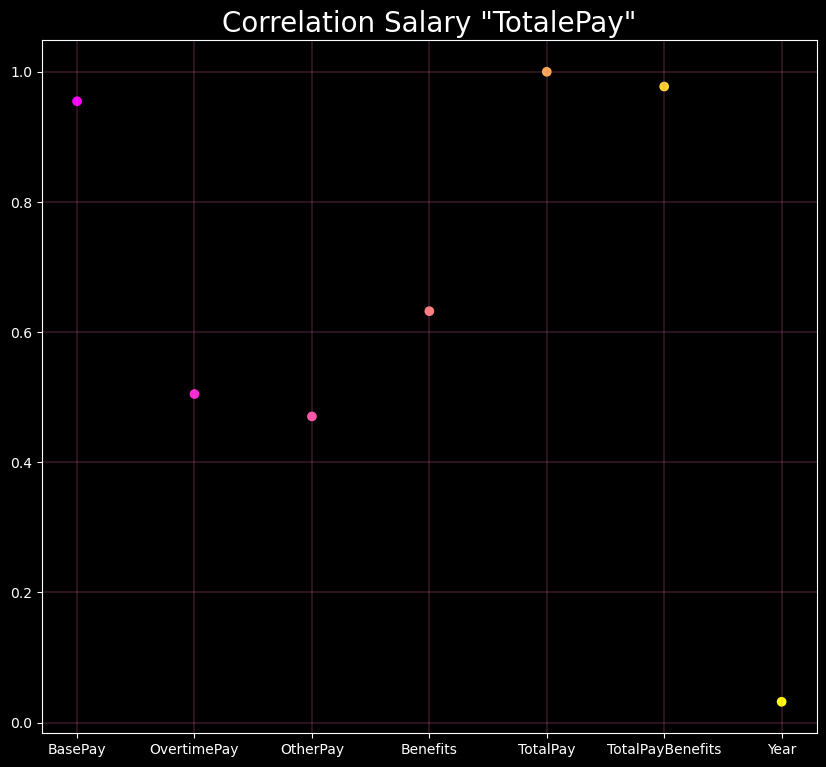

In [11]:
# Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

cr = df.iloc[:, 3: 10].corr()
plt.figure(figsize=(10,9))
plt.title('Correlation Salary "TotalePay"', fontsize=20)
plt.grid(color="hotpink", linewidth=0.25)
x = np.arange(3, 10)
plt.scatter(x, cr["TotalPay"], c=x, cmap='spring')
plt.xticks(np.arange(3, 10), cr["BasePay"].index)
cr.style.background_gradient(cmap='PuRd')

# 7- Summary of Insights:

Write a brief report summarizing the findings and insights from the analyses.

First: I found a determined data other than (Id) witch cause a lot of redundant data in the data frame, like: "Benefits" and 
    "TotalPay" are determined for "TotalPayBenefits".
       
second: depends on my departments distribution engineering employees take most of "Benefits" and
    almost do not get any "OtherPay" or "OvertimePay" and there is other correlations like that.

therd: "JobTitle"s are so much specific which made 50% of data unusable for me at least otherwise "Agency" which has only
    one value (San Francisco).

forth: Newer employees takes higher "Benefits" than older ones.

fifth: "SVC" department contain variance in salaryis, it seems it is has variety in "JobTitle".

Name: Mohammed Fadi Hashem Al-Hennawi

# Good Luck!